# Комп’ютерний практикум 6. Нейронна мережа для задачі регресії

In [49]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn import preprocessing

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Приклад

Text(0.5, 1.0, '$y = sin(x)$')

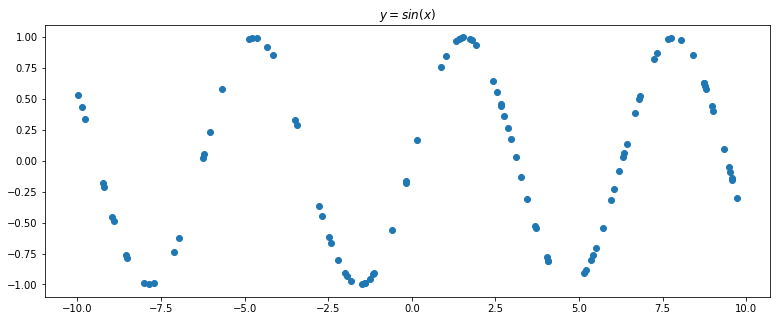

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

(100,)


Text(0.5, 1.0, 'Gaussian noise')

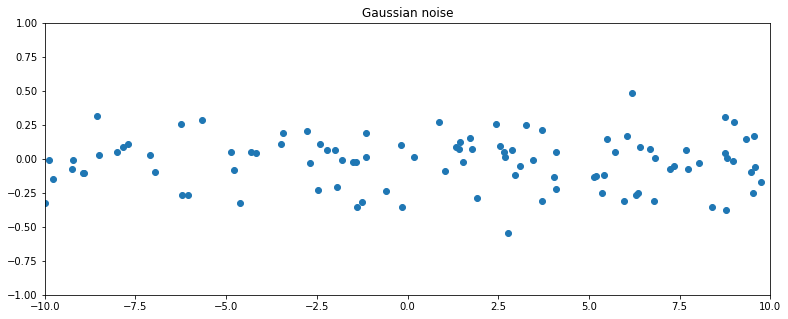

In [3]:
noise = torch.randn(y_train.shape) / 5.
print(x_train.numpy().shape)

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

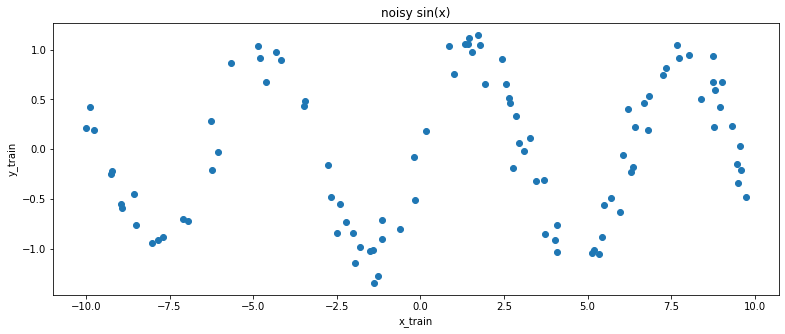

In [4]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
print(x_train.shape)
print(y_train.shape)

torch.Size([100, 1])
torch.Size([100, 1])


Text(0, 0.5, 'y_validation')

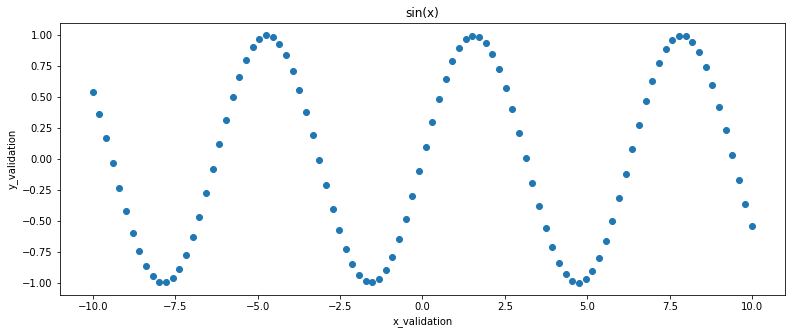

In [6]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [7]:
print(type(x_validation), x_validation.shape)

<class 'torch.Tensor'> torch.Size([100])


In [8]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
pass

In [9]:
print(type(x_validation), x_validation.shape)

<class 'torch.Tensor'> torch.Size([100, 1])


In [10]:
class SineNet(torch.nn.Module):
    
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons*2)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons*2, n_hidden_neurons)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)
        
        # 1) Додайте ще один fc-шар
        # 2) Замінить активацію між шарами на будь-яку іншу та протестуйте відповідь

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x
    

sine_net = SineNet(25)
print(sine_net)

SineNet(
  (fc1): Linear(in_features=1, out_features=25, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=25, out_features=50, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=50, out_features=25, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=25, out_features=1, bias=True)
)


<class 'torch.Tensor'> torch.Size([100, 1])
<class 'torch.Tensor'> torch.Size([100, 1])


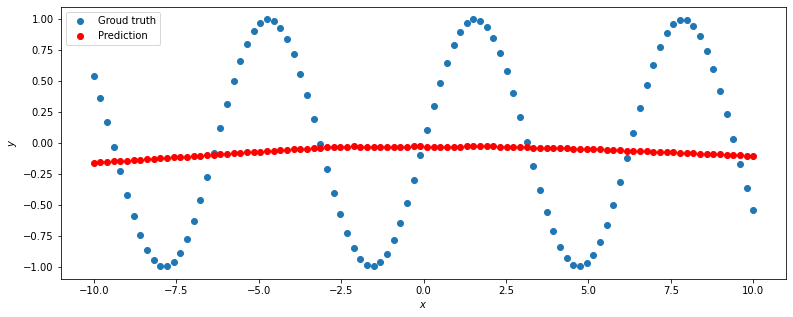

In [11]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
print(type(x_validation), y_validation.shape)
print(type(x_validation), y_validation.shape)

predict(sine_net, x_validation, y_validation)

In [12]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [13]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

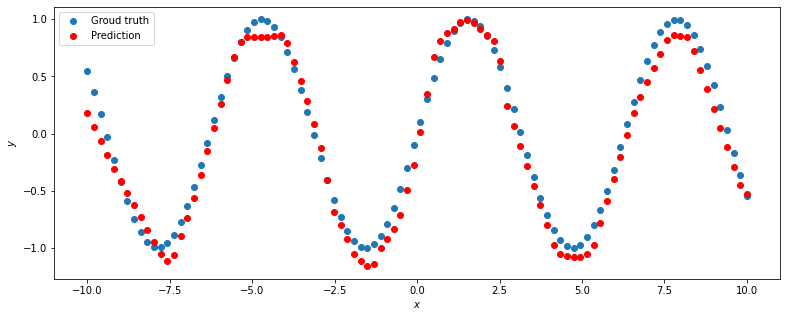

In [14]:
loss_list = []

for epoch_index in range(500):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
    
    loss_list.append(loss_val)
    
predict(sine_net, x_validation, y_validation)

__Проекспериментуйте із отриманою нейромережею:__<br><br>
1) Спробуйте змінити кількість нейронів (1,2,3,4,5,6,7,8,9,10 – проаналізуйте як змінюються передбачення)<br>
2) Спробуйте змінити кількість епох навчання<br>
3) Спробуйте змінити функцію активації<br>
4) Спробуйте змінити (зменшити або додати додаткові шари)<br>
5) Спробуйте змінити функцію втрат<br>
6) Запишіть значення функції втрат після кожної ітерації та виведіть графік залежності функції втрат від номера епоха.

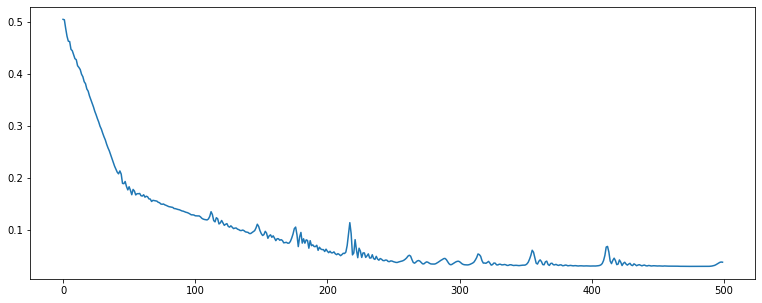

In [15]:
x = list(range(len(loss_list)))
y = [i.item() for i in loss_list]

plt.plot(x, y)
plt.show()

# Завдання 1. Energy efficiency Data Set.

In [16]:
df = pd.read_excel('ENB2012_data.xlsx')
dataset_shape = df.shape
print(dataset_shape)

df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [17]:
df.corr(method='spearman')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.000000,0.000000,0.000000,0.622135,0.651019
X2,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.000000,0.000000,0.000000,-0.622135,-0.651019
X3,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.000000,0.000000,0.000000,0.471458,0.415991
X4,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.000000,0.000000,0.000000,-0.804027,-0.803175
X5,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.000000,0.000000,0.000000,0.861283,0.864876
X6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.004168,0.017606
X7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.187592,0.322860,0.288904
X8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187592,1.000000,0.068343,0.046477
Y1,0.622135,-0.622135,0.471458,-0.804027,0.861283,-0.004168,0.322860,0.068343,1.000000,0.972689
Y2,0.651019,-0.651019,0.415991,-0.803175,0.864876,0.017606,0.288904,0.046477,0.972689,1.000000


In [18]:
TRAIN_PART = 0.8

train_len = int(dataset_shape[0] * TRAIN_PART)
train_len

614

In [19]:
features = torch.tensor(df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].values).float()
Y1 = torch.tensor(df["Y1"].values).unsqueeze_(1).float()
Y2 = torch.tensor(df["Y2"].values).unsqueeze_(1).float()

print(type(features), features.shape)
print(type(Y1), Y1.shape)
print(type(Y2), Y2.shape)

features_train, features_test = torch.split(features, split_size_or_sections=train_len, dim=0)
Y1_train, Y1_test = torch.split(Y1, split_size_or_sections=train_len, dim=0)
Y2_train, Y2_test = torch.split(Y2, split_size_or_sections=train_len, dim=0)

print(features_train.shape, features_test.shape)
print(Y1_train.shape, Y1_test.shape)
print(Y2_train.shape, Y2_test.shape)

<class 'torch.Tensor'> torch.Size([768, 8])
<class 'torch.Tensor'> torch.Size([768, 1])
<class 'torch.Tensor'> torch.Size([768, 1])
torch.Size([614, 8]) torch.Size([154, 8])
torch.Size([614, 1]) torch.Size([154, 1])
torch.Size([614, 1]) torch.Size([154, 1])


In [20]:
class EnerNet(torch.nn.Module):
    
    def __init__(self, number_of_features, n_hidden_neurons):
        super(EnerNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(number_of_features, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons*2)
        self.act2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons*2, n_hidden_neurons)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x
    

ener_net = EnerNet(features.shape[1], 50)
print(ener_net)

EnerNet(
  (fc1): Linear(in_features=8, out_features=50, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)


In [21]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [22]:
print(Y1_test[:10], '\n')

Y1_pred = ener_net.forward(features_test)
print(Y1_pred[:10], '\n')

print("TEST Loss:", loss(Y1_pred, Y1_test))

tensor([[15.0900],
        [15.3000],
        [19.2000],
        [18.8800],
        [18.9000],
        [19.1200],
        [16.7600],
        [17.2300],
        [17.2600],
        [17.1500]]) 

tensor([[16.2953],
        [16.2952],
        [16.6982],
        [16.6981],
        [16.6981],
        [16.6980],
        [17.0998],
        [17.0982],
        [17.0966],
        [17.0950]], grad_fn=<SliceBackward>) 

TEST Loss: tensor(262.3990, grad_fn=<MeanBackward0>)


In [23]:
optimizer = torch.optim.Adam(ener_net.parameters(), lr=0.001)

In [24]:
loss_list = []

for epoch_index in range(2000):
    optimizer.zero_grad()
    
    y_pred = ener_net.forward(features_train)
    loss_val = loss(y_pred, Y1_train)
    loss_val.backward()
    optimizer.step()
      
    loss_list.append(loss_val)

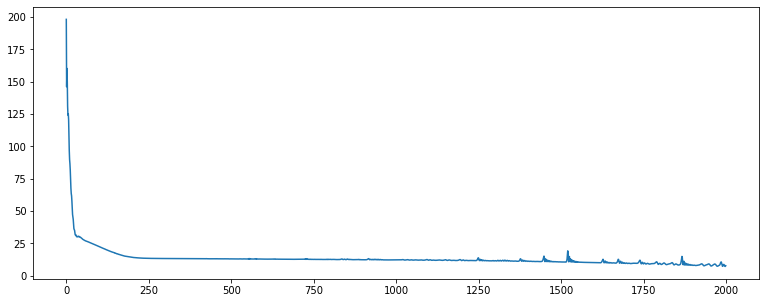

In [25]:
x = list(range(len(loss_list)))
y = [i.item() for i in loss_list]

plt.plot(x, y)
plt.show()

In [26]:
print(Y1_test[:10], '\n')

Y1_pred = ener_net.forward(features_test)
print(Y1_pred[:10], '\n')

print("TEST Loss:", loss(Y1_pred, Y1_test))

tensor([[15.0900],
        [15.3000],
        [19.2000],
        [18.8800],
        [18.9000],
        [19.1200],
        [16.7600],
        [17.2300],
        [17.2600],
        [17.1500]]) 

tensor([[14.8290],
        [14.7830],
        [15.7470],
        [15.6917],
        [15.6364],
        [15.5811],
        [17.1165],
        [17.0360],
        [16.9593],
        [16.8827]], grad_fn=<SliceBackward>) 

TEST Loss: tensor(3.9673, grad_fn=<MeanBackward0>)


In [27]:
# TEST Loss: tensor(19.3594, grad_fn=<MeanBackward0>) -> ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"] epoch:500
# TEST Loss: tensor(43.5277, grad_fn=<MeanBackward0>) -> ["X1", "X3", "X5", "X6", "X7", "X8"]
# TEST Loss: tensor(3.9673, grad_fn=<MeanBackward0>) -> ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"] epoch:2000

# Завдання 2. Diabetes.

In [109]:
path = "diabetes.tab.txt"
df = pd.read_csv(path, sep="\t")
columns = list(df)
df_shape = df.shape
print(columns)
print(df_shape)
df.head()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
(442, 11)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [110]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679


In [111]:
df.corr(method='spearman')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.177463,0.200554,0.350859,0.262524,0.221711,-0.106973,0.221017,0.265176,0.296235,0.197822
SEX,0.177463,1.000000,0.098079,0.261508,0.027790,0.134695,-0.394584,0.337524,0.174625,0.203277,0.037401
BMI,0.200554,0.098079,1.000000,0.397985,0.287829,0.295494,-0.371172,0.459068,0.491609,0.384664,0.561382
BP,0.350859,0.261508,0.397985,1.000000,0.275224,0.205638,-0.191033,0.280799,0.396071,0.381219,0.416241
S1,0.262524,0.027790,0.287829,0.275224,1.000000,0.878793,0.015308,0.520674,0.512864,0.332173,0.232429
S2,0.221711,0.134695,0.295494,0.205638,0.878793,1.000000,-0.197435,0.652283,0.349947,0.286483,0.195834
S3,-0.106973,-0.394584,-0.371172,-0.191033,0.015308,-0.197435,1.000000,-0.789694,-0.450420,-0.290863,-0.410022
S4,0.221017,0.337524,0.459068,0.280799,0.520674,0.652283,-0.789694,1.000000,0.640390,0.413700,0.448931
S5,0.265176,0.174625,0.491609,0.396071,0.512864,0.349947,-0.450420,0.640390,1.000000,0.453023,0.589416
S6,0.296235,0.203277,0.384664,0.381219,0.332173,0.286483,-0.290863,0.413700,0.453023,1.000000,0.350792


In [112]:
TRAIN_PART = 0.8

train_len = int(df_shape[0] * TRAIN_PART)
train_len

353

In [113]:
features = torch.tensor(df[["AGE", "SEX", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]].values).float()
y = torch.tensor(df["Y"].values).unsqueeze_(1).float()

print(type(features), features.shape)
print(type(y), y.shape)

features_train, features_test = torch.split(features, split_size_or_sections=train_len, dim=0)
y_train, y_test = torch.split(y, split_size_or_sections=train_len, dim=0)

print(features_train.shape, features_test.shape)
print(y_train.shape, y_test.shape)

<class 'torch.Tensor'> torch.Size([442, 10])
<class 'torch.Tensor'> torch.Size([442, 1])
torch.Size([353, 10]) torch.Size([89, 10])
torch.Size([353, 1]) torch.Size([89, 1])


In [114]:
diabet_net = EnerNet(features.shape[1], 50)
print(diabet_net)

EnerNet(
  (fc1): Linear(in_features=10, out_features=50, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)


In [115]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [116]:
print(y_test[:10], '\n')

y_pred = diabet_net.forward(features_test)
print(y_pred[:10], '\n')

print("TEST Loss:", loss(y_pred, y_test))

tensor([[0.2617],
        [0.7695],
        [0.1090],
        [0.0903],
        [0.6106],
        [0.2025],
        [0.8910],
        [0.7975],
        [0.4891],
        [0.9221]]) 

tensor([[-0.0226],
        [-0.0313],
        [-0.0173],
        [-0.0152],
        [-0.0231],
        [-0.0104],
        [-0.0257],
        [-0.0204],
        [-0.0156],
        [-0.0283]], grad_fn=<SliceBackward>) 

TEST Loss: tensor(0.2445, grad_fn=<MeanBackward0>)


In [117]:
optimizer = torch.optim.Adam(diabet_net.parameters(), lr=0.001)

In [118]:
loss_list = []

for epoch_index in range(2000):
    optimizer.zero_grad()
    
    y_pred = diabet_net.forward(features_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
      
    loss_list.append(loss_val)

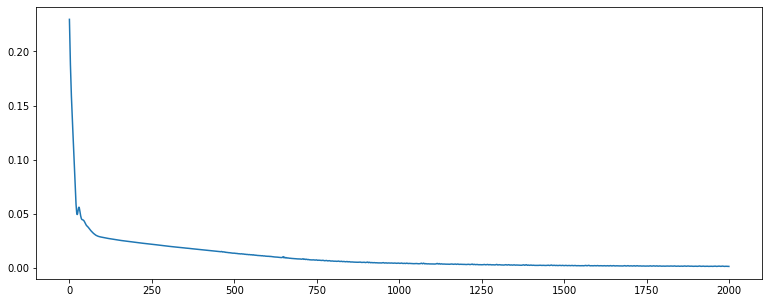

In [119]:
x = list(range(len(loss_list)))
y = [i.item() for i in loss_list]

plt.plot(x, y)
plt.show()

In [120]:
print(y_test[:10], '\n')

y_pred = diabet_net.forward(features_test)
print(y_pred[:10], '\n')

print("TEST Loss:", loss(y_pred, y_test))

tensor([[0.2617],
        [0.7695],
        [0.1090],
        [0.0903],
        [0.6106],
        [0.2025],
        [0.8910],
        [0.7975],
        [0.4891],
        [0.9221]]) 

tensor([[ 0.4685],
        [ 0.4531],
        [ 0.3468],
        [ 0.2278],
        [ 0.0887],
        [ 0.3821],
        [ 0.5039],
        [ 0.5297],
        [-0.0130],
        [ 0.9139]], grad_fn=<SliceBackward>) 

TEST Loss: tensor(0.0995, grad_fn=<MeanBackward0>)
